## Intertrial Interval

### Load Files and Format Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as bp
import seaborn as sns
import statsmodels.api as sm
import scipy.stats

import load_data
import analysis_helper

In [2]:
#load all data - 100, 80, hM4di, mcherry

#load metadata
path_metadata = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\Animal lists.xlsx"
hm4di_metadata = pd.read_excel(path_metadata)
hm4di_metadata[hm4di_metadata["Animal ID"] == "MJn3"]["Acclimation (days)"]

#load data for prelim animals
prelim_path_SAT = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\prelim\\SAT"
prelim_path_100_80 = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\prelim\\100 80 SAT"
prelim = load_data.load_all_data([(prelim_path_SAT, "SAT")], prelim_path_100_80, hm4di_metadata)

#load data for all animals
all_SAT = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\all animals\\SAT"
all_100_80 = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\all animals\\100 80"
all_mch = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\all animals\\mcherry"
all_hm4di = "C:\\Users\\swind\\Documents\\lab work\\lab work barth\\behavior analysis\\Eunsol data\\all animals\\hM4Di SAT"
all_animals = load_data.load_all_data([(all_SAT, "SAT"), (all_mch, "mcherry"), (all_hm4di, "hm4di")], all_100_80, hm4di_metadata)

SAT
GSB8 Caitlyn
GXS5 True
JSS4
NJO1
NLB10
NLB8
NLG3
NLN3
SAT
GKO6 Mason
GSB8 Caitlyn
GXC7 Bambi
GXS4 Khloe
GXS5 True
JND2
JOV1
JSS4
NFZ13
NFZ4
NGX5
NJO1
mcherry
MJL2
MJN2
MJN3
MJN5
MYC4
MZG4
MZG5
NBE11
NCY1
NCY4
NCY6
NDR1
NIO15
NIO16
hm4di
LWP2
LWP4
LWP6
LWP8
MKV10
MKV11
MKV14
NAS9
NBX7
NBX9
NEJ1
NJW5
NKZ10
NKZ3
NKZ4
NKZ7
NLB1
NLB10
NLB3
NLB8
NLG3
NLN3
NLN5
NLV2
NLV3
NLV5


In [3]:
aa= all_animals.reset_index()
aa = aa[(aa["animal"] != "JOV1")]
aa

,condition,animal,trial no,timestamp,poke,lick,water,delay,trial type,acc
0,SAT,GKO6 Mason,1,2019-05-01 12:37:04.849999872,1,0,3,0 days 00:00:00.696000,water,1 days
1,SAT,GKO6 Mason,1,2019-05-01 12:37:04.950000128,0,0,3,0 days 00:00:00.696000,water,1 days
2,SAT,GKO6 Mason,1,2019-05-01 12:37:05.049999872,0,0,3,0 days 00:00:00.696000,water,1 days
3,SAT,GKO6 Mason,1,2019-05-01 12:37:05.150000128,0,0,3,0 days 00:00:00.696000,water,1 days
4,SAT,GKO6 Mason,1,2019-05-01 12:37:05.249999872,0,0,3,0 days 00:00:00.696000,water,1 days
...,...,...,...,...,...,...,...,...,...,...
1660722,100%,NLV5,712,2023-01-02 11:38:52.980000000,0,0,9,0 days 00:00:00,blank,1 days
1660723,100%,NLV5,712,2023-01-02 11:38:53.069999872,0,0,9,0 days 00:00:00,blank,1 days
1660724,100%,NLV5,712,2023-01-02 11:38:53.180000000,0,0,9,0 days 00:00:00,blank,1 days
1660725,100%,NLV5,712,2023-01-02 11:38:53.280000000,0,0,9,0 days 00:00:00,blank,1 days


In [4]:
sns.set_style(style="white", rc={"xtick.bottom":True, "ytick.left":True, "axes.grid":True})
sns.set_context("notebook", rc={"axes.labelsize":18, "axes.titlesize":18, "font.size":20, "xtick.labelsize":14, "ytick.labelsize":14})

### Analysis

In [5]:
aa = analysis_helper.delta(aa, "timestamp")
aa = analysis_helper.trialdelta(aa)
aa = analysis_helper.deliverydelta(aa)
aa = aa.rename({"delta":"time to air"})
aa

,condition,animal,trial no,timestamp,poke,lick,water,delay,trial type,acc,delta,trial delta,delivery delta
0,SAT,GKO6 Mason,1,2019-05-01 12:37:04.849999872,1,0,3,0 days 00:00:00.696000,water,1 days,-1 days +00:00:00,-265.0,-1 days +23:59:59.304000
1,SAT,GKO6 Mason,1,2019-05-01 12:37:04.950000128,0,0,3,0 days 00:00:00.696000,water,1 days,-1 days +00:00:00.100000256,-265.0,-1 days +23:59:59.404000256
2,SAT,GKO6 Mason,1,2019-05-01 12:37:05.049999872,0,0,3,0 days 00:00:00.696000,water,1 days,-1 days +00:00:00.200000,-265.0,-1 days +23:59:59.504000
3,SAT,GKO6 Mason,1,2019-05-01 12:37:05.150000128,0,0,3,0 days 00:00:00.696000,water,1 days,-1 days +00:00:00.300000256,-265.0,-1 days +23:59:59.604000256
4,SAT,GKO6 Mason,1,2019-05-01 12:37:05.249999872,0,0,3,0 days 00:00:00.696000,water,1 days,-1 days +00:00:00.400000,-265.0,-1 days +23:59:59.704000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518465,100%,NLV5,712,2023-01-02 11:38:52.980000000,0,0,9,0 days 00:00:00,blank,1 days,0 days 21:32:27.529999872,391.0,0 days 00:00:01.506999872
1518466,100%,NLV5,712,2023-01-02 11:38:53.069999872,0,0,9,0 days 00:00:00,blank,1 days,0 days 21:32:27.619999744,391.0,0 days 00:00:01.596999744
1518467,100%,NLV5,712,2023-01-02 11:38:53.180000000,0,0,9,0 days 00:00:00,blank,1 days,0 days 21:32:27.729999872,391.0,0 days 00:00:01.706999872
1518468,100%,NLV5,712,2023-01-02 11:38:53.280000000,0,0,9,0 days 00:00:00,blank,1 days,0 days 21:32:27.829999872,391.0,0 days 00:00:01.806999872


#### Total number of trials

F_onewayResult(statistic=array([2.82280519]), pvalue=array([0.0488359]))

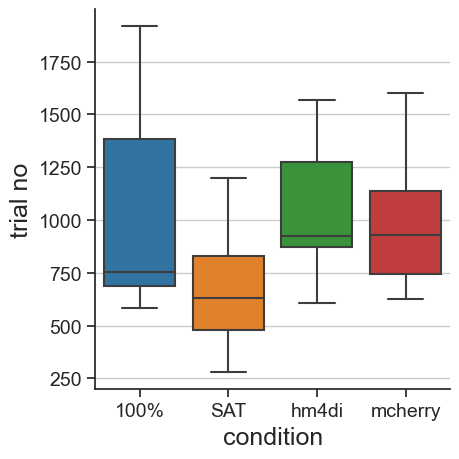

In [6]:
total_trials = aa.groupby(["condition", "animal"]).max()[["trial no", "acc"]].reset_index()
total_trials["acc"] = total_trials["acc"].astype("timedelta64[D]")
sns.catplot(data=total_trials, x="condition",y="trial no", kind="box")

tt = total_trials[["condition", "trial no"]].set_index("condition")
scipy.stats.f_oneway(tt.loc[("SAT")], tt.loc[("100%")], tt.loc[("hm4di")], tt.loc[("mcherry")])

In [ ]:
#split trials by day

#### Number of trials

Text(0.5, 1.02, '80% vs 100% water')

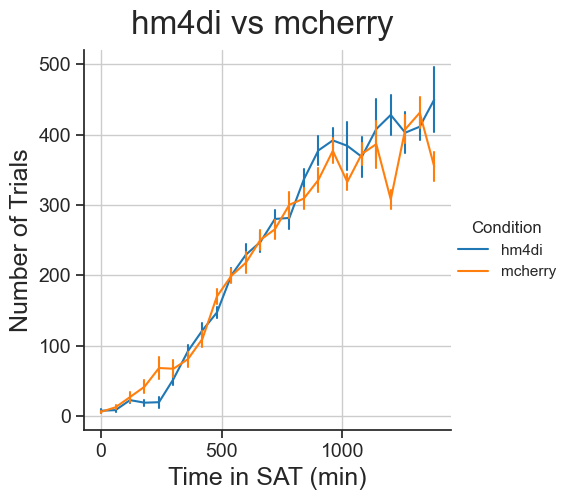

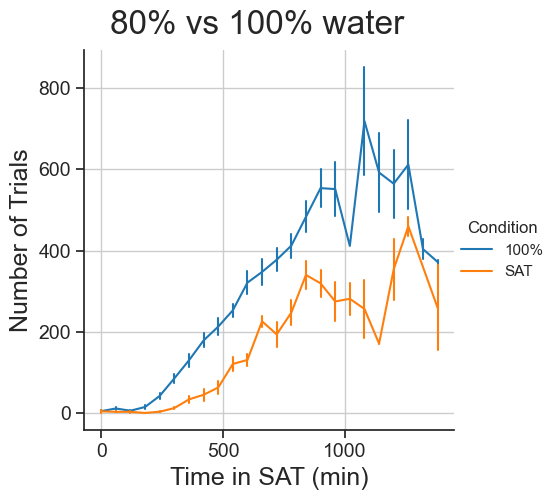

In [8]:
#number of trials over time - mCherry animals start doing trials sooner than hm4di animals
plot = aa

#groupby 30min bins
plot = plot.set_index("delta")
plot = plot.groupby(["condition", "animal", "trial type",pd.Grouper(freq=pd.to_timedelta(60, unit="min"))]).max().reset_index()

start = pd.to_timedelta(0, unit="min")
end = pd.to_timedelta(1440, unit="min")
timecond = (plot["delta"] >= start) & (plot["delta"] < end)

hm4di = (plot["condition"] == "hm4di") | (plot["condition"] == "mcherry")

plot["delta"] = plot["delta"].astype("timedelta64[m]")
g = sns.relplot(data=plot[hm4di & timecond], x="delta", y="trial delta", hue="condition", kind="line", errorbar="se", err_style="bars")
g.set_xlabels("Time in SAT (min)")
g.set_ylabels("Number of Trials")
g._legend.set_title("Condition")
g.fig.suptitle("hm4di vs mcherry", y=1.02)


g = sns.relplot(data=plot[~hm4di & timecond], x="delta", y="trial delta", hue="condition", kind="line", errorbar="se", err_style="bars")
g.set_xlabels("Time in SAT (min)")
g.set_ylabels("Number of Trials")
g._legend.set_title("Condition")
g.fig.suptitle("80% vs 100% water", y=1.02)


#### Intertrial Interval

In [9]:
i = analysis_helper.intervals(aa, ["timestamp", "trial type", "delta", "delivery delta", "trial delta", "lick"])
i

,condition,animal,trial no,timestamp,trial type,delta,delivery delta,trial delta,lick,interval
0,100%,NKZ10,1,2022-12-28 13:49:05.289999872,water,-1 days +00:00:00,-1 days +23:59:59.765000,-801.0,0,0 days 00:03:55.500000
1,100%,NKZ10,2,2022-12-28 13:53:02.970000128,water,-1 days +00:03:57.680000256,-1 days +23:59:59.441000,-800.0,0,0 days 00:08:23.680000
2,100%,NKZ10,3,2022-12-28 14:01:29.130000128,blank,-1 days +00:12:23.840000256,-1 days +23:59:59.692000,-799.0,0,0 days 04:26:46.140000256
3,100%,NKZ10,4,2022-12-28 18:28:17.450000128,water,-1 days +04:39:12.160000256,-1 days +23:59:59.793000,-798.0,0,0 days 01:51:05.120000256
4,100%,NKZ10,5,2022-12-28 20:19:24.650000128,water,-1 days +06:30:19.360000256,-1 days +23:59:59.227000,-797.0,0,0 days 00:10:57.640000
...,...,...,...,...,...,...,...,...,...,...
47682,mcherry,NIO16,701,2022-12-09 12:00:29.640000000,water,0 days 19:35:05.709999872,-1 days +23:59:59.632000,382.0,0,0 days 00:00:00.720000
47683,mcherry,NIO16,702,2022-12-09 12:00:33.140000000,water,0 days 19:35:09.209999872,-1 days +23:59:59.519000,383.0,0,0 days 00:00:00.620000256
47684,mcherry,NIO16,703,2022-12-09 12:00:36.950000128,water,0 days 19:35:13.020000,-1 days +23:59:59.327000,384.0,0,0 days 00:00:00.590000128
47685,mcherry,NIO16,704,2022-12-09 12:00:40.640000000,water,0 days 19:35:16.709999872,-1 days +23:59:59.653000,385.0,1,0 days 00:00:00.640000


Text(0.5, 1.02, '80% vs 100% water')

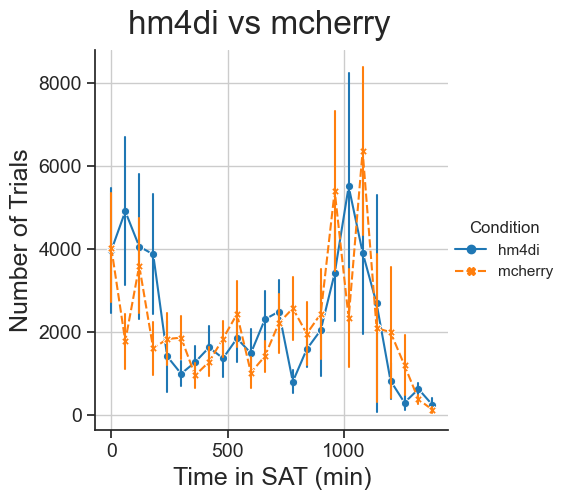

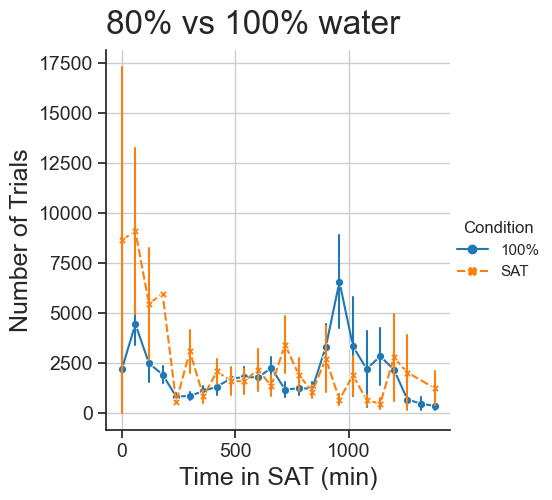

In [10]:
#intertrial interval
i = i.set_index("delta")
i["interval"] = i["interval"].astype("timedelta64[s]")
i = i.groupby(["condition", "animal", "trial type",pd.Grouper(freq=pd.to_timedelta(60, unit="min"))])[["interval"]].max().reset_index()

start = pd.to_timedelta(0, unit="min")
end = pd.to_timedelta(1440, unit="min")
timecond = (i["delta"] >= start) & (i["delta"] < end)

hm4di = (i["condition"] == "hm4di") | (i["condition"] == "mcherry")

i["delta"] = i["delta"].astype("timedelta64[m]")

g = sns.relplot(data=i[hm4di & timecond], x="delta", y="interval", kind="line", hue="condition", style="condition", markers=True, errorbar="se", err_style="bars")
g.set_xlabels("Time in SAT (min)")
g.set_ylabels("Number of Trials")
g._legend.set_title("Condition")
g.fig.suptitle("hm4di vs mcherry", y=1.02)

g = sns.relplot(data=i[~hm4di & timecond], x="delta", y="interval", kind="line", hue="condition", style="condition", markers=True, errorbar="se", err_style="bars")
g.set_xlabels("Time in SAT (min)")
g.set_ylabels("Number of Trials")
g._legend.set_title("Condition")
g.fig.suptitle("80% vs 100% water", y=1.02)

### Conclusion


Max (ii) or averaged (num trials) into 60 min bins


hM4Di animals feel the air puff more than mCherry animals – they take longer to start doing trials after the start of SAT and the time between trials is longer after the start of SAT